**ANÁLISIS DE UN DATASET (ORIENTACIÓN DATA SCIENTIST)**

**E-commerce Cosmetic Products**

About Dataset

The popularity of cosmetic products has snowballed over the past few years. Hence, there have been many more brands and makeup products on the market, especially in the online market. To analyze the online marketing trends in the Indian cosmetic industry, we have used some of the most popular Indian websites like Amazon, Flipkart, Ulta, and Sephora to scrape the product data. This dataset also contains the ingredients of these products, which can be further analyzed.

[https://www.kaggle.com/datasets/devi5723/e-commerce-cosmetics-dataset?resource=download](https://www.kaggle.com/datasets/devi5723/e-commerce-cosmetics-dataset?resource=download)

**Objetivo:**

1. Clasificación y prediccion de popularidad: predecir si un producto será popular (alto número de ratings)

In [ ]:
!pip install ydata-profiling

#1. Extracción y transformación de Data

## 1.1 Carga de dataset

In [22]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/Project E-Commerce Cosmetic/E-commerce cosmetic.csv", encoding="latin1")
data.head()

,product_name,website,country,category,subcategory,title-href,price,brand,ingredients,form,type,color,size,rating,noofratings
0,"Carlton London Incense Eau da parfum, Premium ...",Flipkart,India,body,perfume,https://www.amazon.in/Carlton-London-Limited-I...,599.0,Carlton London,NaN,aerosol,NaN,"Top Note: Orange Blossom, Blackberry | Heart N...",100,3.9,19
1,CHARLENE SPRAY MIST PERFUME 30 - INTIMATE (PAC...,Flipkart,India,body,perfume,https://www.amazon.in/CHARLENE-SPRAY-MIST-PERF...,149.0,Charlene,NaN,aerosol,NaN,Unit count type:,30,4.4,"4,031"
2,CHARLENE SPRAY MIST PERFUME 30 - INTIMATE (PAC...,Flipkart,India,body,perfume,https://www.amazon.in/CHARLENE-SPRAY-MIST-PERF...,298.0,Charlene,NaN,aerosol,NaN,Unit count type:,30,4.4,"4,072"
3,DENVER Black Code Perfume - 60 | Eau de Parfum...,Flipkart,India,body,perfume,https://www.amazon.in/DENVER-Black-Code-Perfum...,245.0,Denver,NaN,aerosol,NaN,Long-Lasting Scent,60,4.2,61
4,Denver Hamilton Perfume - 100 | Long Lasting P...,Flipkart,India,body,perfume,https://www.amazon.in/Denver-Perfume-Hamilton-...,422.0,Denver,NaN,aerosol,NaN,Long-Lasting Scent,100,4.3,342


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12555 entries, 0 to 12614
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  12555 non-null  object 
 1   website       12555 non-null  object 
 2   country       12555 non-null  object 
 3   category      12555 non-null  object 
 4   subcategory   12555 non-null  object 
 5   title-href    12555 non-null  object 
 6   price         12238 non-null  float64
 7   brand         12555 non-null  object 
 8   ingredients   6547 non-null   object 
 9   form          12555 non-null  object 
 10  type          9876 non-null   object 
 11  color         10572 non-null  object 
 12  size          9409 non-null   object 
 13  rating        10494 non-null  object 
 14  noofratings   12102 non-null  object 
dtypes: float64(1), object(14)
memory usage: 1.5+ MB


## 1.2 Exploración  y Transformación

### 1.2.1 EDA Analisis de Exploración de Datos Automática(Opcion adicional para corroborar y complementar el análisis exploratorio)

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(data, title="E-Commerce Cosmetic Report", explorative= True)
profile.to_file("cosmetic_report.html")

Con base al análisis exploratorio inicial se observa lo siguiente (Anexo 1):

Dataset statistics:

*   Number of variables	 15
*   Number of observations = 12615
*   Missing cells	= 16694
*   Missing cells (%)	= 8.8%
*   Duplicate rows =	60
*   Duplicate rows (%)	0.5%

Ahora, con base a las columnas como **rating** y **noofratings** se debe realizar transformación de datos, dado que se importaron tipo object y se encuentra información que no es numerica, de otro lado se deben categorizar columnas como **country**, **category**, **subcategory**, entre otras.

Así mismo, se encuentra la columna **ingredients** tiene el 47% de información vacia.

###1.2.2 Análisis de valores nulos

In [ ]:
datos_nulos=data[data.isnull().any(axis=1)]

print("Total de registros: ", data.shape[0])
print("Registros con datos nulos: ", datos_nulos.shape[0])
print("Porcentaje de registros con datos nulos: ", round((datos_nulos.shape[0]/data.shape[0]*100),2), "%")

#data=data.dropna()

Total de registros:  12615
Registros con datos nulos:  7882
Porcentaje de registros con datos nulos:  62.48 %


In [ ]:
# Conteo de nulos
conteo_nulos = data.isnull().sum()

# Porcentaje de nulos
nulos_porcentaje = (conteo_nulos / data.shape[0]) * 100


reporte_faltantes = pd.DataFrame({
    'Nulos': conteo_nulos,
    'Porcentaje': nulos_porcentaje.round(2)
}).sort_values(by='Porcentaje', ascending=False)

print(reporte_faltantes)

              Nulos  Porcentaje
ingredients    6015       47.68
size           3166       25.10
type           2681       21.25
rating         2067       16.39
color          1989       15.77
noofratings     459        3.64
price           317        2.51
title-href        0        0.00
subcategory       0        0.00
category          0        0.00
country           0        0.00
product_name      0        0.00
website           0        0.00
form              0        0.00
brand             0        0.00


###1.2.3 Análisis de duplicados

In [23]:
duplicados_exactos = data.duplicated().sum()

print("Total de registros: ", data.shape[0])
print("Registros duplicados exactos: ", duplicados_exactos)
print("Porcentaje de registros con datos duplicados: ", round((duplicados_exactos/data.shape[0]*100),2), "%")


#eliminación de duplicados
data = data.drop_duplicates()



Total de registros:  12615
Registros duplicados exactos:  60
Porcentaje de registros con datos duplicados:  0.48 %


###1.2.4 Exploración

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12555 entries, 0 to 12614
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  12555 non-null  object 
 1   website       12555 non-null  object 
 2   country       12555 non-null  object 
 3   category      12555 non-null  object 
 4   subcategory   12555 non-null  object 
 5   title-href    12555 non-null  object 
 6   price         12238 non-null  float64
 7   brand         12555 non-null  object 
 8   ingredients   6547 non-null   object 
 9   form          12555 non-null  object 
 10  type          9876 non-null   object 
 11  color         10572 non-null  object 
 12  size          9409 non-null   object 
 13  rating        10494 non-null  object 
 14  noofratings   12102 non-null  object 
dtypes: float64(1), object(14)
memory usage: 1.5+ MB


Con base a las columnas como **rating** y **noofratings** (número de valoraciones o reseñas) se debe realizar transformación de datos, dado que se importaron tipo object, se supone que se encuentra información que no es solamente numerica, de otro lado se deben categorizar columnas como **country**, **category**, **subcategory**, entre otras, las cuales para los datos vacios se imputara una descripción "Unknown"

Así mismo, se encuentra que la columna **ingredients** presenta el 47% de información vacia, esta columna no se deberia tener en cuenta, sin embargo, no se elimina para efectos de soportes. De otro lado, se evidencia 60 registros duplicados, por lo tanto, esta información si se elimina del data set.

/tmp/ipython-input-73582293.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette="viridis", ax=axes[0])


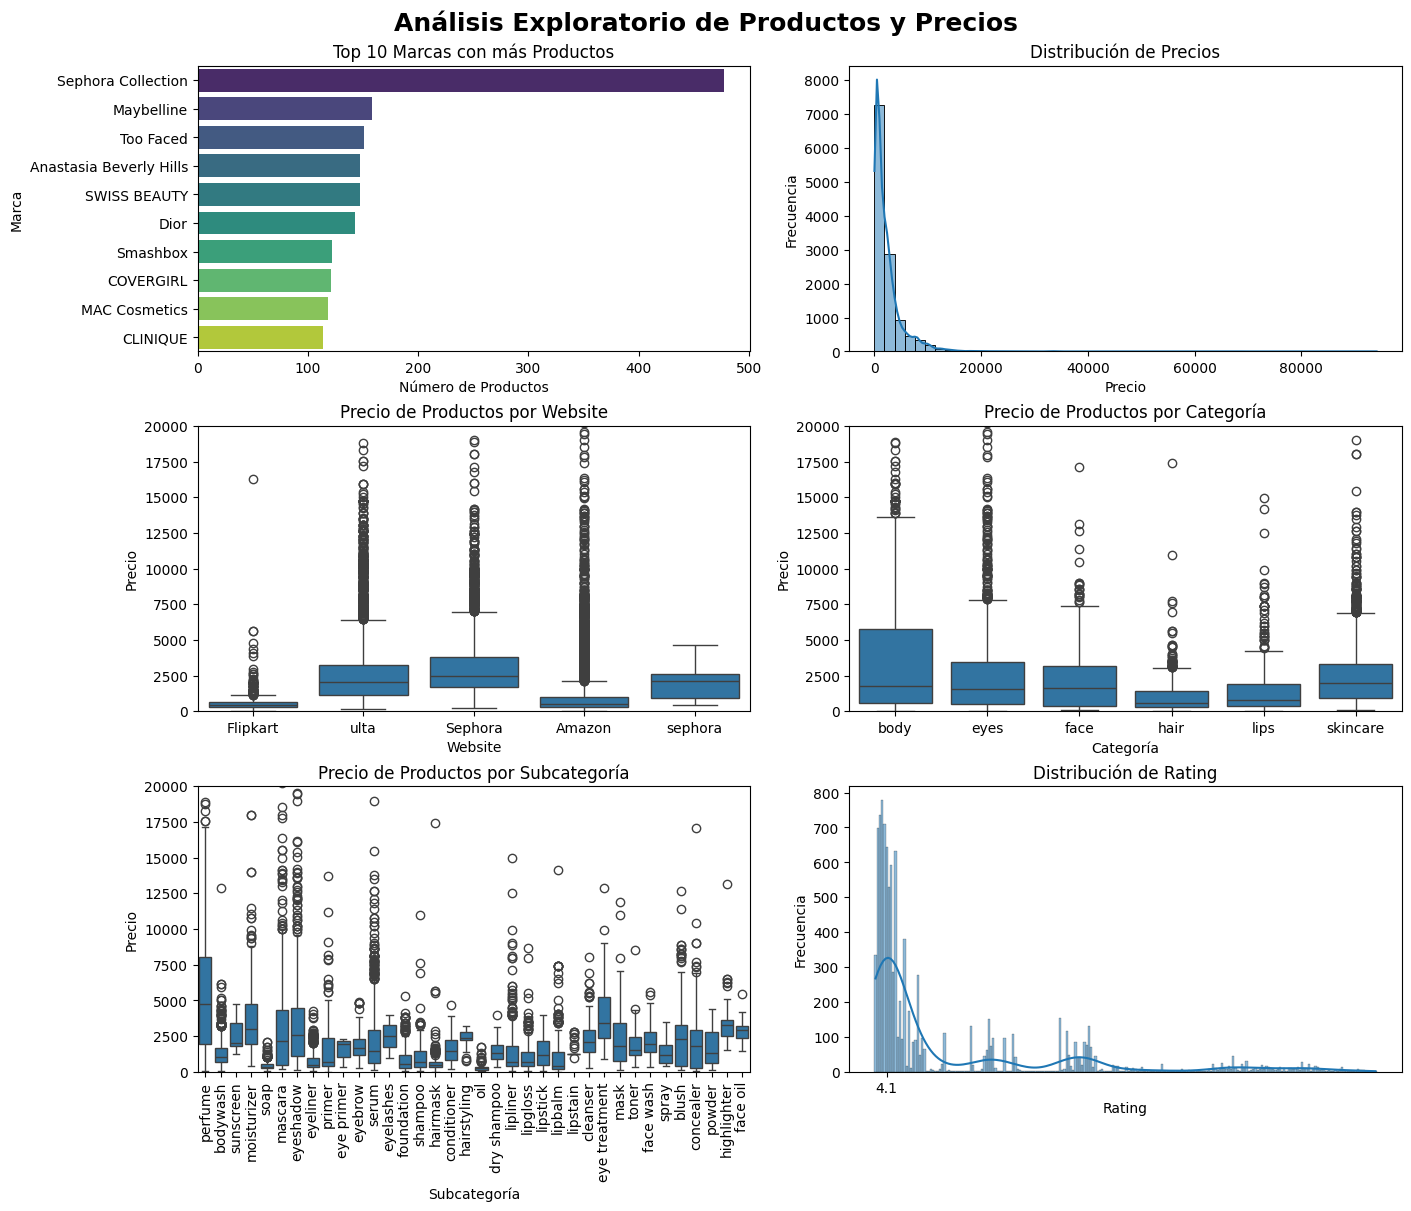

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(14, 12), constrained_layout=True)
axes = axes.flatten()  # arreglo plano para indexar fácil

# --- 1. Top 10 marcas con más productos ---
top_brands = data['brand'].value_counts().head(10)
sns.barplot(x=top_brands.values, y=top_brands.index, palette="viridis", ax=axes[0])
axes[0].set_title("Top 10 Marcas con más Productos")
axes[0].set_xlabel("Número de Productos")
axes[0].set_ylabel("Marca")

# --- 2. Distribución de precios ---
sns.histplot(data['price'].dropna(), bins=50, kde=True, ax=axes[1])
axes[1].set_title("Distribución de Precios")
axes[1].set_xlabel("Precio")
axes[1].set_ylabel("Frecuencia")

# --- 3. Precio medio por website ---
sns.boxplot(x="website", y="price", data=data, ax=axes[2])
axes[2].set_title("Precio de Productos por Website")
axes[2].set_xlabel("Website")
axes[2].set_ylabel("Precio")
axes[2].set_ylim(0, 20000)

# --- 4. Precio medio por categoría ---
sns.boxplot(x="category", y="price", data=data, ax=axes[3])
axes[3].set_title("Precio de Productos por Categoría")
axes[3].set_xlabel("Categoría")
axes[3].set_ylabel("Precio")
axes[3].set_ylim(0, 20000)

# --- 5. Precio medio por subcategoría ---
sns.boxplot(x="subcategory", y="price", data=data, ax=axes[4])
axes[4].set_title("Precio de Productos por Subcategoría")
axes[4].set_xlabel("Subcategoría")
axes[4].set_ylabel("Precio")
axes[4].set_ylim(0, 20000)
axes[4].tick_params(axis="x", rotation=90)

sns.histplot(data['rating'].dropna(), bins=20, kde=True, ax=axes[5])
axes[5].set_title("Distribución de Rating")
axes[5].set_xlabel("Rating")
axes[5].set_ylabel("Frecuencia")
axes[5].set_xticks([5])


plt.suptitle("Análisis Exploratorio de Productos y Precios", fontsize=18, weight="bold")
plt.show()

Dado el tipo de dato "object" cargado en el data frame, para la columna ratings (la cual debe encontrarse entre 1 a 5) lo que se deduce que existen caracteres, ahora, segun el gráfico de distribución, se evidencia numeros mayores a 5.

###1.2.5 Transformación y Limpieza

In [24]:


# Normalizar columna 'rating': extraer solo el número (ej: "2.8 out of 5 stars" -> 2.8)
def limpiar_rating(value):
    if pd.isna(value):
        return None
    try:
        return float(str(value).split()[0].replace(",", "."))
    except:
        return None


# Normalizar columna 'noofratings': quitar comas y convertir a int
def limpiar_noofratings(value):
    if pd.isna(value):
        return None
    try:
        return int(str(value).replace(",", "").strip())
    except:
        return None

In [25]:
#Limpieza

data["noofratings_clean"] = data["noofratings"].apply(limpiar_noofratings)
data["rating_clean"] = data["rating"].apply(limpiar_rating)
#data['noofratings_clean'] = limpiar_columna_numerica(data, 'noofratings', tipo="int")

In [26]:
# Imputación de Datos

columnas_categorical = ["size", "type"]
for col in columnas_categorical:
    data[col] = data[col].fillna("Unknown")

#Estandarizar la información de la columna website
data["website"] = data["website"].str.strip().str.lower()

# Imputación a campos numéricos con 0, dado que el porcentaje de nulos es menor al 5%
data["noofratings_clean"] = data["noofratings_clean"].fillna(0)

# Imputación a campos numéricos con la mediana
data["price"] = data["price"].fillna(data["price"].median())
data["rating_clean"] = data["rating_clean"].fillna(data["rating_clean"].median())


In [27]:
data[~((data["rating_clean"] >= 1) & (data["rating_clean"] <= 5))].shape[0]

51

In [28]:
# Mantener solo registros con rating_clean válido (entre 1 y 5)
data = data[(data["rating_clean"] <= 5)]
print(f"Total registros después: {data.shape[0]}")

#len(data.loc[data["rating_clean"] > 5])


Total registros después: 12504


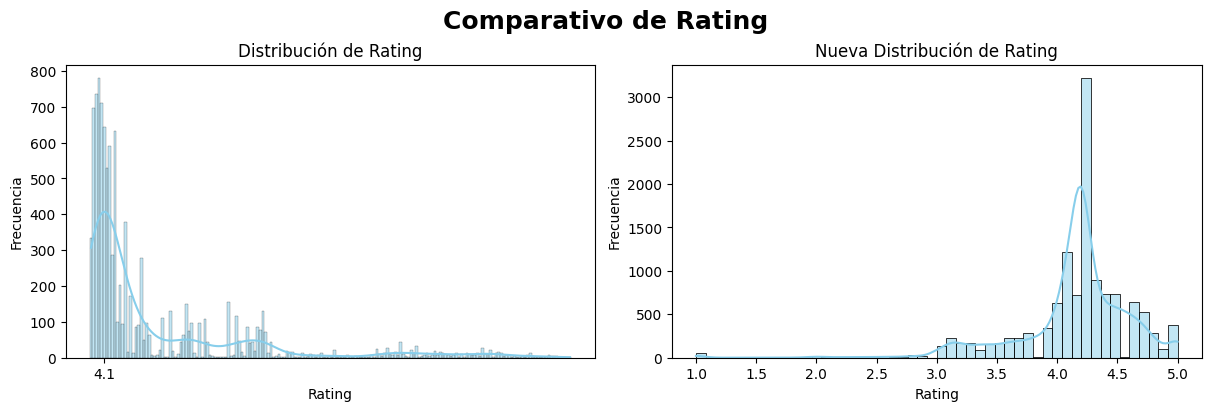

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)
axes = axes.flatten()  # arreglo plano para indexar fácil

# --- 1. Top 10 marcas con más productos ---
sns.histplot(data['rating'].dropna(), bins=50, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Distribución de Rating")
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Frecuencia")
axes[0].set_xticks([5])

# --- 2. Distribución de precios ---
sns.histplot(data['rating_clean'].dropna(), bins=50, kde=True,color="skyblue", ax=axes[1])
axes[1].set_title("Nueva Distribución de Rating")
axes[1].set_xlabel("Rating")
axes[1].set_ylabel("Frecuencia")

plt.suptitle("Comparativo de Rating", fontsize=18, weight="bold")
plt.show()

In [ ]:
#Revisión de quartiles para el número de ratings

dataCopy = data.copy()

dataCopy["quartile_noofratings_clean"] = pd.qcut(dataCopy["noofratings_clean"], q=4, labels=["Q1", "Q2", "Q3", "Q4"])


df4 = dataCopy.groupby("quartile_noofratings_clean").agg(
    count=("noofratings_clean", "count"),
    min=("noofratings_clean", "min"),
    max=("noofratings_clean", "max"),
    high_ratings=("rating_clean", lambda x: (x >= 4).sum())
)

df4

/tmp/ipython-input-1721858028.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df4 = dataCopy.groupby("quartile_noofratings_clean").agg(


,count,min,max,high_ratings
quartile_noofratings_clean,,,,
Q1,3202,0.0,5.0,2733
Q2,3074,6.0,24.0,2357
Q3,3105,25.0,254.0,2247
Q4,3123,255.0,220040.0,2767


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12504 entries, 0 to 12614
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_name       12504 non-null  object 
 1   website            12504 non-null  object 
 2   country            12504 non-null  object 
 3   category           12504 non-null  object 
 4   subcategory        12504 non-null  object 
 5   title-href         12504 non-null  object 
 6   price              12504 non-null  float64
 7   brand              12504 non-null  object 
 8   ingredients        6541 non-null   object 
 9   form               12504 non-null  object 
 10  type               12504 non-null  object 
 11  color              10528 non-null  object 
 12  size               12504 non-null  object 
 13  rating             10443 non-null  object 
 14  noofratings        12094 non-null  object 
 15  noofratings_clean  12504 non-null  float64
 16  rating_clean       12504 no

In [29]:
# Rating 4 y 5 con el top 25% en votaciones (noofratings)

limite = data["noofratings_clean"].quantile(0.75)  # top 25% como populares
data["popular"] = (
    (data["noofratings_clean"] >= limite).astype(bool) &
    (data["rating_clean"] > 4.0).astype(bool)
).astype(int)

print("Umbral usado:", limite)
print(data["popular"].value_counts(normalize=True))

Umbral usado: 254.0
popular
0    0.796625
1    0.203375
Name: proportion, dtype: float64


In [30]:
# Verificar cambios
data[["price", "rating", "rating_clean", "noofratings", "noofratings_clean"]].head(10)

#df[df['rating'].astype(str).str.contains("stars", na=False)].head()
#data[data['rating'].astype(str).str.contains("14,338", na=False)].head()
data.loc[data["rating"].str.contains("14,338", na=False), ["price", "rating", "rating_clean"]]

,price,rating,rating_clean


Dado que que se identificaron outliers en el precio (valores muy altos), y con el objetivo de mejorar la robustez de los modelos de predicción, evitando que estos valores distorsionen el entrenamiento, se aplicará Winsorización (ajustar a los límites calculados IQR) de los valores extremos superiores por subcategoría, siendo este un nivel bajo, con lo cual, no mezclaria tipos de productos. Importante anotar que se crea una columna price_winsor, con el objetivo de mantener la trazabilidad con el precio original.

In [31]:
#Function Winsorización
def winsorize_by_subcategory(df, col, lower, upper):
    df_clean = df.copy()
    # Calcular límites por subcategoría
    bounds = df_clean.groupby("subcategory")[col].quantile([lower, upper]).unstack()
    bounds.columns = ["lower", "upper"]

    # Aplicar winsorización por subcategoría
    def clip_values(row):
        low = bounds.loc[row["subcategory"], "lower"]
        up = bounds.loc[row["subcategory"], "upper"]
        return min(max(row[col], low), up)

    df_clean[col + "_winsor"] = df_clean.apply(clip_values, axis=1)
    return df_clean



In [32]:
# Windorización de precios
data = winsorize_by_subcategory(data, col="price", lower=0.01, upper=0.99)


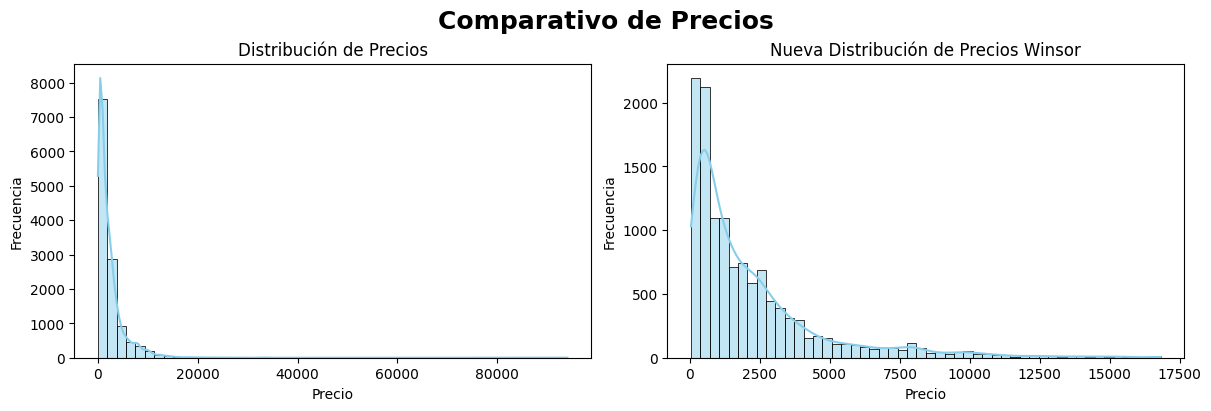

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)
axes = axes.flatten()  # arreglo plano para indexar fácil

# --- 1. Distribución de precios ---
sns.histplot(data['price'], bins=50, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Distribución de Precios")
axes[0].set_xlabel("Precio")
axes[0].set_ylabel("Frecuencia")

# --- 2. Distribución de precios winsor---
sns.histplot(data['price_winsor'], bins=50, kde=True,color="skyblue", ax=axes[1])
axes[1].set_title("Nueva Distribución de Precios Winsor")
axes[1].set_xlabel("Precio")
axes[1].set_ylabel("Frecuencia")

plt.suptitle("Comparativo de Precios", fontsize=18, weight="bold")
plt.show()



Se aplicó winsorización al nivel de subcategoría usando percentiles 1–99 siendo una manera conservadora para reducir el impacto de outliers extremos en los precios, manteniendo la distribución representativa.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12504 entries, 0 to 12614
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_name       12504 non-null  object 
 1   website            12504 non-null  object 
 2   country            12504 non-null  object 
 3   category           12504 non-null  object 
 4   subcategory        12504 non-null  object 
 5   title-href         12504 non-null  object 
 6   price              12504 non-null  float64
 7   brand              12504 non-null  object 
 8   ingredients        12504 non-null  object 
 9   form               12504 non-null  object 
 10  type               12504 non-null  object 
 11  color              12504 non-null  object 
 12  size               12504 non-null  object 
 13  rating             10443 non-null  object 
 14  noofratings        12094 non-null  object 
 15  noofratings_clean  12504 non-null  float64
 16  rating_clean       12504 no

## 1.3 Modelado Predictivo

1.3.1 Validación variables dependientes

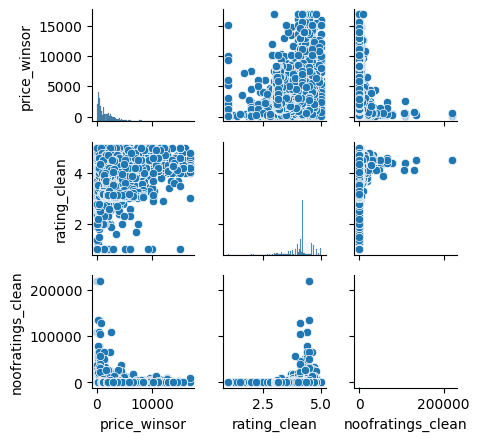

In [ ]:
numerical_cols = data[['price_winsor', 'rating_clean' , 'noofratings_clean']]

g = sns.PairGrid(numerical_cols, height=1.5)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

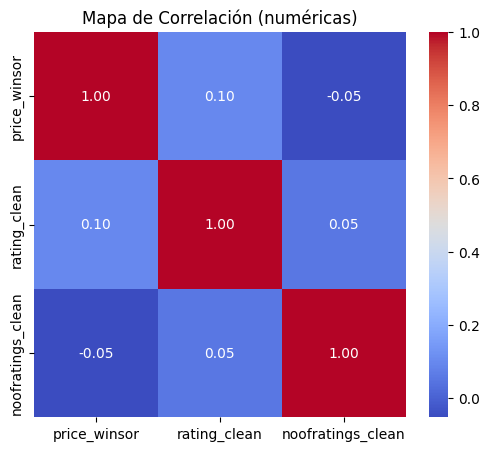

In [ ]:
corr_matrix = numerical_cols.corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Mapa de Correlación (numéricas)")
plt.show()

Dado los resultados de las viariables númericas frente a su correlación se realiza un correlograma incluyendo variables dumies, par ver su relación lineal


price                        1.000000
subcategory_perfume          0.359336
website_Sephora              0.180254
website_ulta                 0.135371
country_USA                  0.135371
subcategory_eyeshadow        0.096061
subcategory_moisturizer      0.085717
rating_clean                 0.083380
subcategory_mascara          0.058623
subcategory_eye treatment    0.050212
Name: price, dtype: float64

---

subcategory_lipstick   -0.071669
subcategory_lipbalm    -0.077313
subcategory_lipgloss   -0.077767
subcategory_oil        -0.080303
subcategory_hairmask   -0.084317
subcategory_eyeliner   -0.089269
subcategory_soap       -0.111216
category_hair          -0.135931
website_Flipkart       -0.157266
category_lips          -0.157704
Name: price, dtype: float64


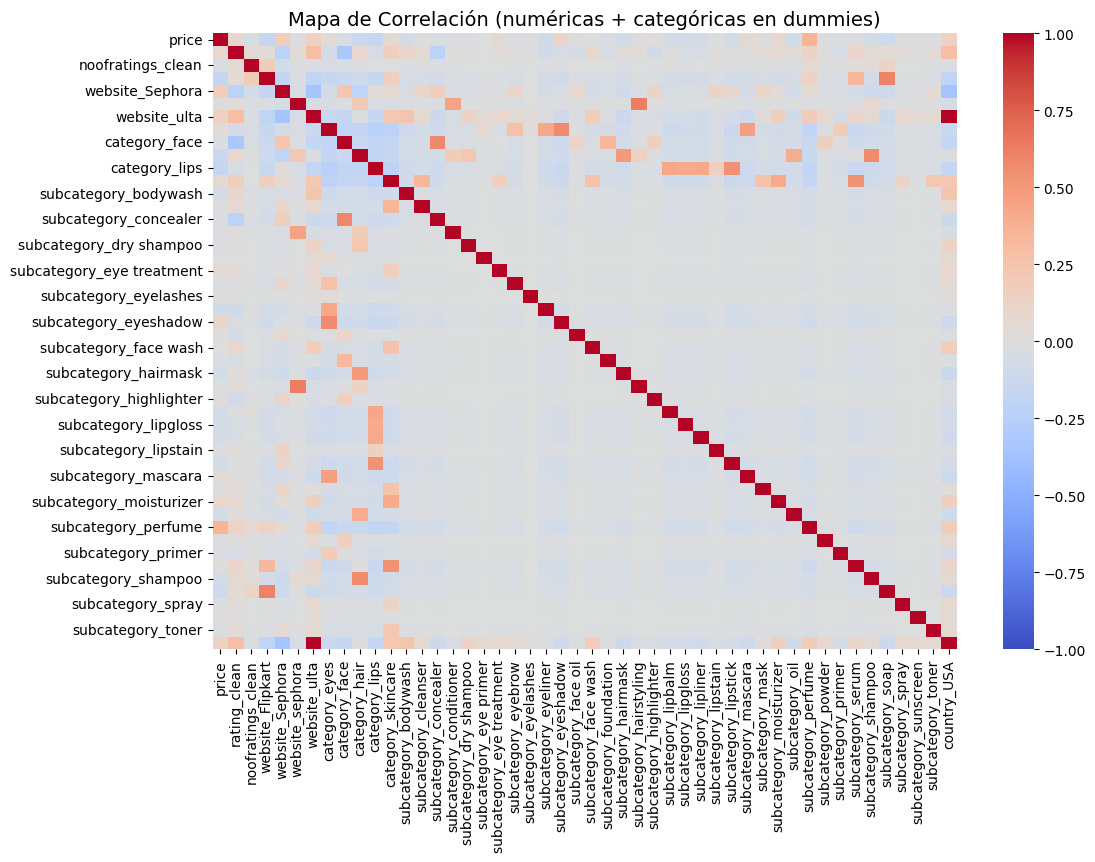

In [ ]:
#numerical_cols = ['price', 'rating_clean', 'noofratings_clean']
categorical_cols = ['website', 'category', 'subcategory', 'country']

data_dummies = pd.get_dummies(data[categorical_cols], drop_first=True)

data_encoded = pd.concat([numerical_cols, data_dummies], axis=1)

# Calcular correlación respecto a la variable precio ---
corr_with_price = data_encoded.corr()['price'].sort_values(ascending=False)

# Mostrar las 10 variables más correlacionadas con el precio
print(corr_with_price.head(10))
print("\n---\n")
print(corr_with_price.tail(10))

# --- 6. Graficar un heatmap con todas (puede ser pesado si hay muchas marcas) ---
plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.corr(), cmap="coolwarm", center=0, vmin=-1, vmax=1, cbar=True)
plt.title("Mapa de Correlación (numéricas + categóricas en dummies)", fontsize=14)
plt.show()

In [33]:
# Variables categóricas
categorical_cols = ['website', 'category', 'subcategory', 'country']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=False)

#Dado que se selecciona Randon Forest (el cual controla la multicolinealidad) se deja
#drop_first=False, para que muestre todas las columnas y opciones en la productivización

print("Dimensiones después de encoding:", data_encoded.shape)

Dimensiones después de encoding: (12504, 63)


### 1.3.1 Predicción si un producto será popular (alto número de ratings) Modelo de clasificación

Lo anterior muestra que la correlación lineal es baja, sin embargo, estas variables permiten evidenciar relaciones clave para explicar qué productos alcanzarían mayor visibilidad e interacción. Es decir que las variables seleccionadas para predecir la popularidad (precio ajustado, rating, noofrating,website, subcategoría y país) integran elementos de percepción del cliente y mercado.

In [34]:
from sklearn.model_selection import train_test_split

cols_to_drop = ["product_name", "title-href", "price", "brand", "ingredients",
                "form", "type", "color", "size", "rating", "rating_clean", "noofratings", "noofratings_clean", "popular" ]

X = data_encoded.drop(columns=cols_to_drop, errors="ignore")

y = data_encoded ['popular']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

print("Train dataset size:", X_train.shape)

print("Test dataset size:", X_test.shape)


Train dataset size: (9378, 49)
Test dataset size: (3126, 49)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9378 entries, 1054 to 12574
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price_winsor               9378 non-null   float64
 1   website_amazon             9378 non-null   bool   
 2   website_flipkart           9378 non-null   bool   
 3   website_sephora            9378 non-null   bool   
 4   website_ulta               9378 non-null   bool   
 5   category_body              9378 non-null   bool   
 6   category_eyes              9378 non-null   bool   
 7   category_face              9378 non-null   bool   
 8   category_hair              9378 non-null   bool   
 9   category_lips              9378 non-null   bool   
 10  category_skincare          9378 non-null   bool   
 11  subcategory_blush          9378 non-null   bool   
 12  subcategory_bodywash       9378 non-null   bool   
 13  subcategory_cleanser       9378 non-null   bool  

Dado que no hay una relación lineal, usaremos los modelos de clasificación Logistica y Ramdon Forest para comparar sus resultados

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- Modelo Regresión Logística ---
log_model = LogisticRegression(max_iter=1000, random_state=7)
log_model.fit(X_train, y_train)

# Predicciones
y_pred_log = log_model.predict(X_test)

# Resultados
print("Regresión Logística")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_log))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_log))


Regresión Logística
Accuracy: 0.7787328876154092
Matriz de Confusión:
 [[2370  127]
 [ 568   76]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87      2497
           1       0.37      0.12      0.18       644

    accuracy                           0.78      3141
   macro avg       0.59      0.53      0.53      3141
weighted avg       0.72      0.78      0.73      3141



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- Modelo Random Forest ---
rf_model = RandomForestClassifier(n_estimators=200, random_state=7)
rf_model.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test)

# Resultados
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_rf))

Random Forest
Accuracy: 0.8128598848368522
Matriz de Confusión:
 [[2239  242]
 [ 343  302]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      2481
           1       0.56      0.47      0.51       645

    accuracy                           0.81      3126
   macro avg       0.71      0.69      0.70      3126
weighted avg       0.80      0.81      0.81      3126



In [15]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- Modelo XGBoost ---
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=1
)
xgb_model.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Resultados
print("XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_xgb))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_xgb))

XGBoost
Accuracy: 0.8226679401464502
Matriz de Confusión:
 [[2341  156]
 [ 401  243]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      2497
           1       0.61      0.38      0.47       644

    accuracy                           0.82      3141
   macro avg       0.73      0.66      0.68      3141
weighted avg       0.80      0.82      0.81      3141



Se selecciona Random Forest porque:
Tiene mejor accuracy que la regresión logistica y aunque su accuracy es muy cercano a XGBoost (accuracy 0.75, 0,81 y 0,82 respectivamente).
Reconoce más productos populares randon forest que los demas (recall 0.14, 0.46 y 0.38).

**Lección Aprendida** En principio se realiza el modelo teniendo en cuenta la varibale rating_clean, sin embargo se observa que no es funcional para predicciones, dado que no se va contar con esa información desde el principio, por lo tanto, se procede a retirar la variable rating_clean, como resultado era de esperarse que la precisión global disminuya de 81% al 78%, pero el modelo sigue siendo válido porque ahora se centra en variables que están disponibles antes del lanzamiento del producto. Esto lo convierte en un modelo predictivo para estimar la popularidad futura.

**Lección Aprendida** Al productuvizar se identificó que no era posible contar con todas las combinaciones del encoding, dado que para evitar multicolinealidad se eliminaron las variables que presentaban esta particularidad, ejemplo, el caso de la categorical country, como solo hay dos opciones eliminó el pais "India". Por lo tanto, para que la productivizacion fuera aplicable y fácil de entender para el usuario, igualmente, como el resultado del mejor modelo aplicado fue utilizar ramdon forest, que por su naturaleza de árbol binario, no tendría problema con la multicolinealidad, se procede a hacer entrenamiento de modelo dejando la multicolinealidad.

Uso del modelo de clasificación random forest

In [ ]:
import pickle

# Guardar modelo
with open("modelo.pkl", "wb") as f:
    pickle.dump(rf_model, f)

# Guardar columnas
with open("columnas.pkl", "wb") as f:
    pickle.dump(X_train.columns.tolist(), f)